In [1]:
import pandas as pd

In [4]:
red_df=pd.read_csv('data/winequality-red.csv',sep=';', header=0, engine='python')
white_df=pd.read_csv('data/winequality-white.csv',sep=';', header=0, engine='python')

red_df.to_csv('data/winequality-red2.csv',index=False)
white_df.to_csv('data/winequality-white2.csv',index=False)

In [7]:
red_df
white_df
# columns에 와인 퀄리티 결정하는 속성값이 있음

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


- 데이터 병합하기

In [10]:
# red와 white를 합쳐야 함
#type이라는 필드를 추가하여 red와 white를 구분 필요
red_df.insert(0,column='type',value='red')

print(red_df.head())
print(red_df.shape)

ValueError: cannot insert type, already exists

In [11]:
white_df.insert(0,column='type',value='white')

print(red_df.head())
print(red_df.shape)

  type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [12]:
wine=pd.concat([red_df,white_df])
print(wine.shape)

(6497, 13)


In [13]:
wine.to_csv('data/wine.csv',index=False)

# 데이터 탐색하기
- 기본정보 확인
- wine 데이터셋 필드
- type : 와인 타입(red, white)
- fixed acidity : 결합산 - 주로 타르타산(tartaric), 사과산(malic)으로 구성, 완인의 산도 제어
- volatile acidity : 휘발산 - 와인의 향과 연관
- citric acid : 구연산 - 와인의 신선함을 올려주는 역할, 산성화에 연관을 미침
- residual sugar : 잔여 설탕 - 화인의 단맛을 올여줌
- chlorides : 염화물 - 화인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
- free sulfur dioxide : 이산화 황 활성
- total sulfur dioxide : 이산화 황 총량
- sulphates : 황산염
- ** 황 화합물 : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 (free sulfur dioxide, total sulfur dioxide, sulphates)
- density : 밀도 - 바디의 높고 낮음을 표현하는 와인의 무게감
- pH : 산성도 - 와인의 신맛의 정도를 나타냄
- alcohol : 알코올
- quality : 품질

In [15]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


- 함수 사용 기술 통계 구하기

In [17]:
wine.columns=wine.columns.str.replace(' ','_')
print(wine.head())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [19]:
print(wine.describe()) # count / 평균 / 표준편차 / 사사분위 / 최대

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [20]:
print(sorted(wine.quality.unique()))
print(wine.quality.value_counts())

[3, 4, 5, 6, 7, 8, 9]
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


# 데이터 모델링
 - describe() 함수로 그룹 비교하기

In [24]:
print(wine.groupby('type')['quality'].describe())

        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


In [22]:
print(wine.groupby('type')['quality'].mean())

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


In [23]:
print(wine.groupby('type')['quality'].std())

type
red      0.807569
white    0.885639
Name: quality, dtype: float64


In [25]:
print(wine.groupby('type')['quality'].agg(['mean','std']))

           mean       std
type                     
red    5.636023  0.807569
white  5.877909  0.885639


# t-검정과 회귀분석으로 그룹 비교하기
- t 검정을 위해서는 scipy 라이브러리 패키지를 사용
- 회귀 분석을 위해서는 statsmodels 라이브러리 패키지를 사용
- 명령 프롬프트 창에서 다음과 같이 입력하여 statsmodels 패키지 설치
- pip install statsmodels

In [44]:
#t-검정에 필요한 scipy 패키지의 stats 함수 로드
from scipy import stats
# 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
from statsmodels.formula.api import ols, glm

# 레드 와인 샘플의 quality 값만 찾아서 red_wine에 저장
red_wine_quality=wine.loc[wine['type']=='red','quality']

# 화이트 와인 샘플의 quality 값만 찾아서 red_wine에 저장
white_wine_quality=wine.loc[wine['type']=='white','quality']

# scipy 패키지의 stats.ttest_ind() 함수를 사용하여 t-검정을 하고 두 그룹 간 차이를 확인
stats.ttest_ind(red_wine_quality, white_wind_quality, equal_var=False)

# 결과 : 와인 type에 대하여 유의미한 품질 차이는 없음

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [45]:
# 선형 회귀 분석식의 종속 변수(y)와 독립 변수(x1~x10)를 구성
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
      residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
      density + pH + sulphates + alcohol'

# 선형 회귀 모델 중에서 OLSOrdinary Least Squares 모델을 사용
regression_result=ols(Rformula, data=wine).fit()

# 선형 회귀 분석과 관련된 통계값을 출력
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:56:08   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 생성한 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [46]:
# 1. 예측에 사용할 첫 번째 샘플 데이터 만들기
# wine에서 quality와 type 열은 제외하고(독립변수만 남음), 회귀 분석 모델에 사용할 독립 변수만 추출하여 sample1에 저장
sample1= wine[wine.columns.difference(['qualitu','type'])]
# sample1에 있는 샘플 중에서 0번~4번 4개 생플만 추출하고, sample1에 다시 저장하여 예측에 사용할 샘플을 제작
sample1=sample1[0:5][:]

# 첫 번째 생픔의 quality 예측하기
# 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 결과 예측값을 출력
sample1_predict=regression_result.predict(sample1)
# sample1_predict를 출력하여 예측한 quality를 확인
print(sample1_predict)
#wine에서 0번~4번까지 샘플의 quality 값을 출력하여 sample1_predict이 맞게 예측되었는지 확인
wine[0:5]['quality']

# 실제로 분석할 때는 랜덤한 행을 골라 test데이터와 훈련 데이터를 20:80 비율로...
# 테스트 데이터를 훈련에 참여시키지 않고, 데이터 분석 결과의 정확성을 체크할 때 사용하기도...

# 결과 : 테스트 데이터를 이용했을 때 예측값이 거의 다 맞음

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [47]:
# 예측에 사용할 두 번째 샘플 데이터 만들기
# 회귀실에 사용한 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 제작

data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5],
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]}

# 딕셔너리 형태의 값과 sample1의 열 이름만 뽑아 데이터프레임으로 묶은 sample2를 제장
sample2=pd.DataFrame(data,columns=sample1.columns)
# sample2를 출력하여 제대로 구성되었는지 확인
print(sample2)

# 두 번째 샘플의 quality 예측하기
# 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤
# 결과 예측값을 sample2_predict에 저장
sample2_predict=regression_result.predict(sample2)
# sample2_predict를 출력하여 예측한 quality를 확인
print(sample2_predict)

   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0     9.00      0.055          0.3    0.996            8.5   
1     0.88      0.040          0.4    0.910            8.1   

   free_sulfur_dioxide    pH quality  residual_sugar  sulphates  \
0                 30.0  3.25     NaN             6.1       0.40   
1                 31.0  3.01     NaN             5.8       0.35   

   total_sulfur_dioxide  volatile_acidity  
0                  98.0               0.8  
1                  99.0               0.5  
0    4.809094
1    7.582129
dtype: float64


# 결과 시각화
## 와인 유형에 따른 품질 등급 히스토그램 그리기
- pip install seaborn

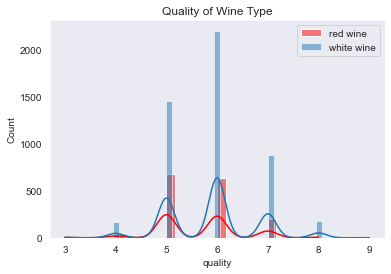

In [49]:
# 시각화에 필요한 패키지를 로드
import matplotlib.pyplot as plt
import seaborn as sns

# 커널 밀도 추정(kde)을 적용한 히스토그램 그리기
# 히스토그램 차트의 배경색 스타일을 설정
sns.set_style('dark')
# 레드 와인에 대한 distplot 객체를 생성
sns.histplot(red_wine_quality, kde=True, color='red', label='red wine')
# 화이트 와인에 대한 distplot 객체를 생성
sns.histplot(white_wine_quality, kde=True, label='white wine')
# 차트 제목을 설정
plt.title('Quality of Wine Type')
# 차트 범례를 설정
plt.legend()
# 설정한 내용대로 차트를 표시
plt.show()

# 결과 : 

# 부분 회귀 플롯으로 시각화하기
- 독립 변수가 2개 이상인 경우에는 부분 회귀 플롯을 사용하여 하나의 독립 변수가 종속 변수에 미치는 영향력을 시각화 함으로써 결과를 분석할 수 있음
- plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
- endog: 종속변수 문자열
- exog_i: 분석 대상이 되는 독립변수 문자열
- exog_others: 나머지 독립변수 문자열의 리스트
- data: 모든 데이터가 있는 데이터프레임
- obs_labels: 데이터 라벨링 여부
- ret_coords: 잔차 데이터 반환 여부

eval_env: 1


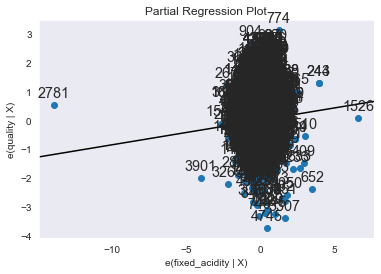

In [54]:
# 부분 회귀 계산을 위해 statsmodels.api를 로드
import statsmodels.api as sm

# fixed_acidity가 종속 변수 quality에 미치는 영향력을 시각화하기

# 부분 회귀에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 이름을 리스트 others로 추출
others=list(set(wine.columns).difference(set(["quality","fixed_acidity"])))
# 나머지 변수는 고정하고 fixed)acidity가 종속 변수 qaulity에 미치는 영향에 부분회귀를 수행
p, resids=sm.graphics.plot_partregress("quality","fixed_acidity", others, data=wine, ret_coords=True)
# 부분 회귀의 결과를 플롯으로 시각화하여 나타냄
plt.show()

# 결과 : 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


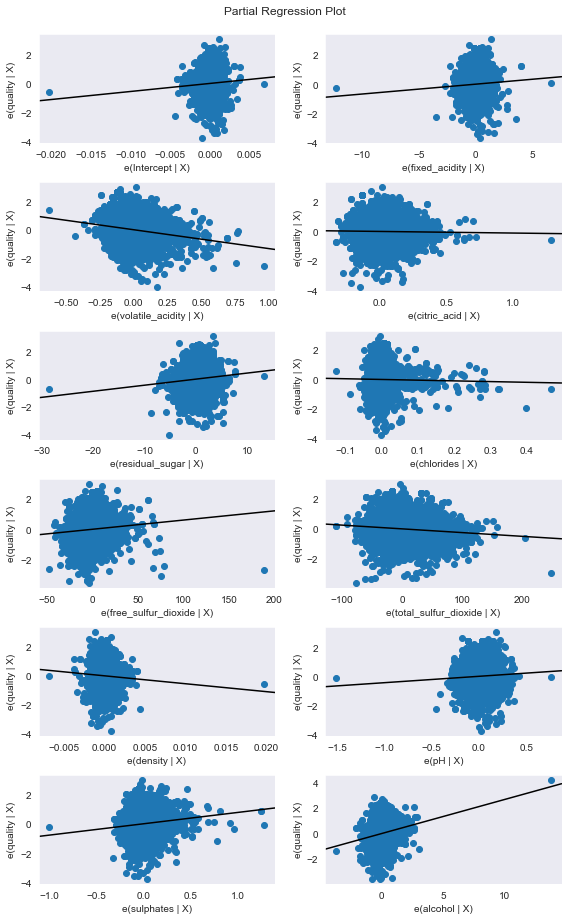

In [56]:
# 각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화하기
# 차트의 크기를 지정
fig=plt.figure(figsize=(8,13))
# 다중 선형 회귀 분석 결과를 가지고 있는 regression_result를 이용해 각 독립변수의 부분회귀 플롯을 구함
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
# 부분 회귀 결과를 플롯으로 시각화하여 나타냄
plt.show()